# 1 - Inicialize and import libraries

In [56]:
# If the code is executed from Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/TFM_Generacion_electrica_AEMET/Python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/TFM_Generacion_electrica_AEMET/Python'
/content/drive/My Drive/TFM_Generacion_electrica_AEMET/Python


In [57]:
# Instalacion libreria AEMET para ingesta de datos
!pip install python-aemet

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Lectura_AEMET_REE import Ingestion_AEMET,Ingestion_REE
from utils import limpieza, rellena_nulos_provincia, sns_generacion, target_preprocesing
import warnings

pd.options.display.max_columns=None
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_style("ticks")
warnings.filterwarnings("ignore")

Ing_AEMET=Ingestion_AEMET()
Ing_REE=Ingestion_REE()



# 2- Cleaning data <a id='From_csv'></a>

In [59]:
df_weather=Ing_AEMET.read_from_csv()
df_ree=Ing_REE.read_from_csv()

In [60]:
df_ree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80796 entries, 0 to 736
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       80795 non-null  float64
 1   percentage  80796 non-null  float64
 2   datetime    80796 non-null  object 
 3   title       80796 non-null  object 
 4   type        80796 non-null  object 
 5   system      80796 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.3+ MB


In [61]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488890 entries, 0 to 488889
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fecha        488890 non-null  object
 1   indicativo   488890 non-null  object
 2   nombre       488890 non-null  object
 3   provincia    488890 non-null  object
 4   altitud      488890 non-null  object
 5   tmed         475527 non-null  object
 6   prec         474674 non-null  object
 7   tmin         475568 non-null  object
 8   horatmin     468438 non-null  object
 9   tmax         475669 non-null  object
 10  horatmax     468825 non-null  object
 11  dir          454018 non-null  object
 12  velmedia     457030 non-null  object
 13  racha        454025 non-null  object
 14  horaracha    454000 non-null  object
 15  sol          271366 non-null  object
 16  presMax      364704 non-null  object
 17  horaPresMax  364696 non-null  object
 18  presMin      364709 non-null  object
 19  ho

## Limpieza datos AEMET


In [62]:
# Elimino las columnas que no me interesan
df_weather.drop(columns=['altitud','horaPresMax','horaPresMin','horaracha','dir','horatmin','horatmax'],inplace=True)

df_weather=limpieza(df_weather,df_weather.columns[4:13])
df_weather

,fecha,indicativo,nombre,provincia,tmed,prec,tmin,tmax,velmedia,racha,sol,presMax,presMin,Holiday,weekday
0,2016-01-01,0252D,ARENYS DE MAR,BARCELONA,11.2,0.2,7.8,14.7,1.7,7.2,NaN,NaN,NaN,1,4
1,2016-01-02,0252D,ARENYS DE MAR,BARCELONA,11.8,0.0,7.5,16.1,1.1,9.7,NaN,NaN,NaN,0,5
2,2016-01-03,0252D,ARENYS DE MAR,BARCELONA,10.0,0.0,5.8,14.1,1.9,9.2,NaN,NaN,NaN,0,6
3,2016-01-04,0252D,ARENYS DE MAR,BARCELONA,11.6,0.9,8.0,15.3,0.8,8.9,NaN,NaN,NaN,0,0
4,2016-01-05,0252D,ARENYS DE MAR,BARCELONA,9.9,0.1,5.6,14.2,2.5,8.6,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488885,2021-05-24,C429I,TENERIFE SUR AEROPUERTO,STA. CRUZ DE TENERIFE,21.3,0.0,18.3,24.3,11.4,20.0,12.3,1013.0,1010.5,0,0
488886,2021-05-25,C429I,TENERIFE SUR AEROPUERTO,STA. CRUZ DE TENERIFE,22.2,0.0,18.7,25.7,10.8,16.9,12.2,1013.3,1010.4,0,1
488887,2021-05-26,C429I,TENERIFE SUR AEROPUERTO,STA. CRUZ DE TENERIFE,20.5,0.0,16.7,24.3,6.4,15.0,9.7,1012.9,1008.3,0,2
488888,2021-05-27,C429I,TENERIFE SUR AEROPUERTO,STA. CRUZ DE TENERIFE,21.2,0.0,18.2,24.2,5.8,13.3,9.0,1008.9,1006.5,0,3


In [63]:
df_weather_group=rellena_nulos_provincia(df_weather,['tmax','presMax','racha'],['tmin','presMin'],['prec','tmed','sol','velmedia'])

In [64]:
electric_systems={
    'STA. CRUZ DE TENERIFE':'canarias',
    'LAS PALMAS':'canarias',
    'ILLES BALEARS':'baleares',
    'CEUTA':'ceuta',
    'MELILLA':'melilla'}

# Now each provincia have the same weigth in the DataFrame, we need to agrup by electric system to join the data after.

df_weather_group['system']=[electric_systems[l.upper()]  
                      if l.upper() in electric_systems.keys() else 'peninsular' 
                      for l in df_weather_group['provincia'] ]

weather_grouped=df_weather_group.groupby(['fecha','system','Holiday','weekday'],as_index=False)
df_weather_system=weather_grouped.mean(['tmed','prec','tmin','tmax','velmedia','sol','presMax','presMin','racha'])
df_weather_system.fillna(0,inplace=True)
df_weather_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9875 entries, 0 to 9874
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     9875 non-null   object 
 1   system    9875 non-null   object 
 2   Holiday   9875 non-null   object 
 3   weekday   9875 non-null   object 
 4   tmin      9875 non-null   float64
 5   presMin   9875 non-null   float64
 6   prec      9875 non-null   float64
 7   tmed      9875 non-null   float64
 8   sol       9875 non-null   float64
 9   velmedia  9875 non-null   float64
 10  tmax      9875 non-null   float64
 11  presMax   9875 non-null   float64
 12  racha     9875 non-null   float64
dtypes: float64(9), object(4)
memory usage: 1.1+ MB


## Limpieza de datos de REE

In [65]:
Renovable_system=pd.unique(df_ree[df_ree['type']=='Renovable']['system'])
df_ree_renov=df_ree[df_ree['system'].isin(Renovable_system)]

In [66]:
df_ree_renov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76691 entries, 0 to 736
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       76690 non-null  float64
 1   percentage  76691 non-null  float64
 2   datetime    76691 non-null  object 
 3   title       76691 non-null  object 
 4   type        76691 non-null  object 
 5   system      76691 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.1+ MB


In [67]:
# Renombro los campos
df_ree_renov.rename(columns={'value':'Generacion_Mwh','title':'Tecnologia','type':'Renov_norenov'},inplace=True)

# Elimino la columna percentage por ser una columna generada de Generacion_Mwh.
df_ree_renov.drop(columns=['percentage'],inplace=True)

# Cambio los valores nulos de Generacion en Mwh por 0
df_ree_renov['Generacion_Mwh']=df_ree_renov['Generacion_Mwh'].fillna(0).astype(float)

# Elimino las filas para las cuales la fecha es nula y paso la fecha a formato corto.
df_ree_renov['fecha']=df_ree_renov['datetime'].str[:10]
df_ree_renov=df_ree_renov[~df_ree_renov['fecha'].isna()]
df_ree_renov.drop(columns=['datetime'],inplace=True)
df_ree_renov.head()

,Generacion_Mwh,Tecnologia,Renov_norenov,system,fecha
0,29281.000,Hidráulica,Renovable,peninsular,2016-01-01
1,35544.881,Hidráulica,Renovable,peninsular,2016-01-02
2,35910.705,Hidráulica,Renovable,peninsular,2016-01-03
3,65268.886,Hidráulica,Renovable,peninsular,2016-01-04
4,79718.832,Hidráulica,Renovable,peninsular,2016-01-05


#3- Electric generation features analysis

## Total Generation

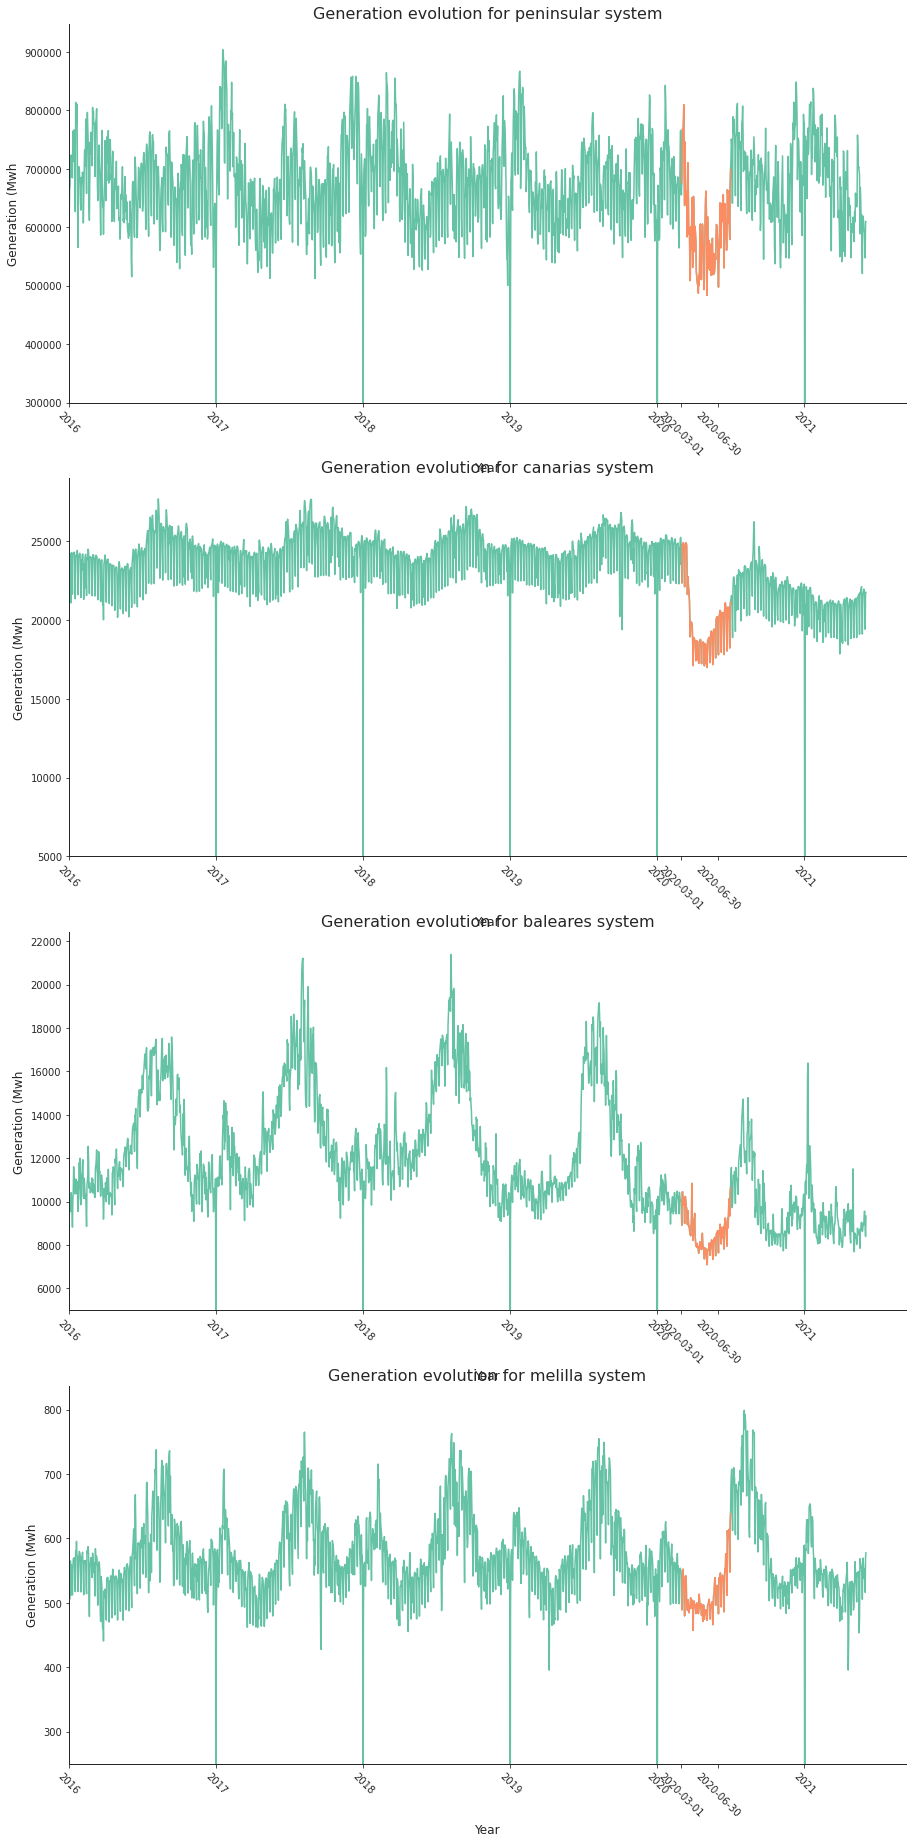

In [68]:
sns_generacion(df_ree_renov,['Generación total'],Renovable_system,'2020-03-01','2020-06-30')

In [69]:
df_ree_filtered=df_ree_renov[(df_ree_renov['fecha']<'2020-03-15') | (df_ree_renov['fecha']>='2020-06-28')]

#4- Weather features analysis

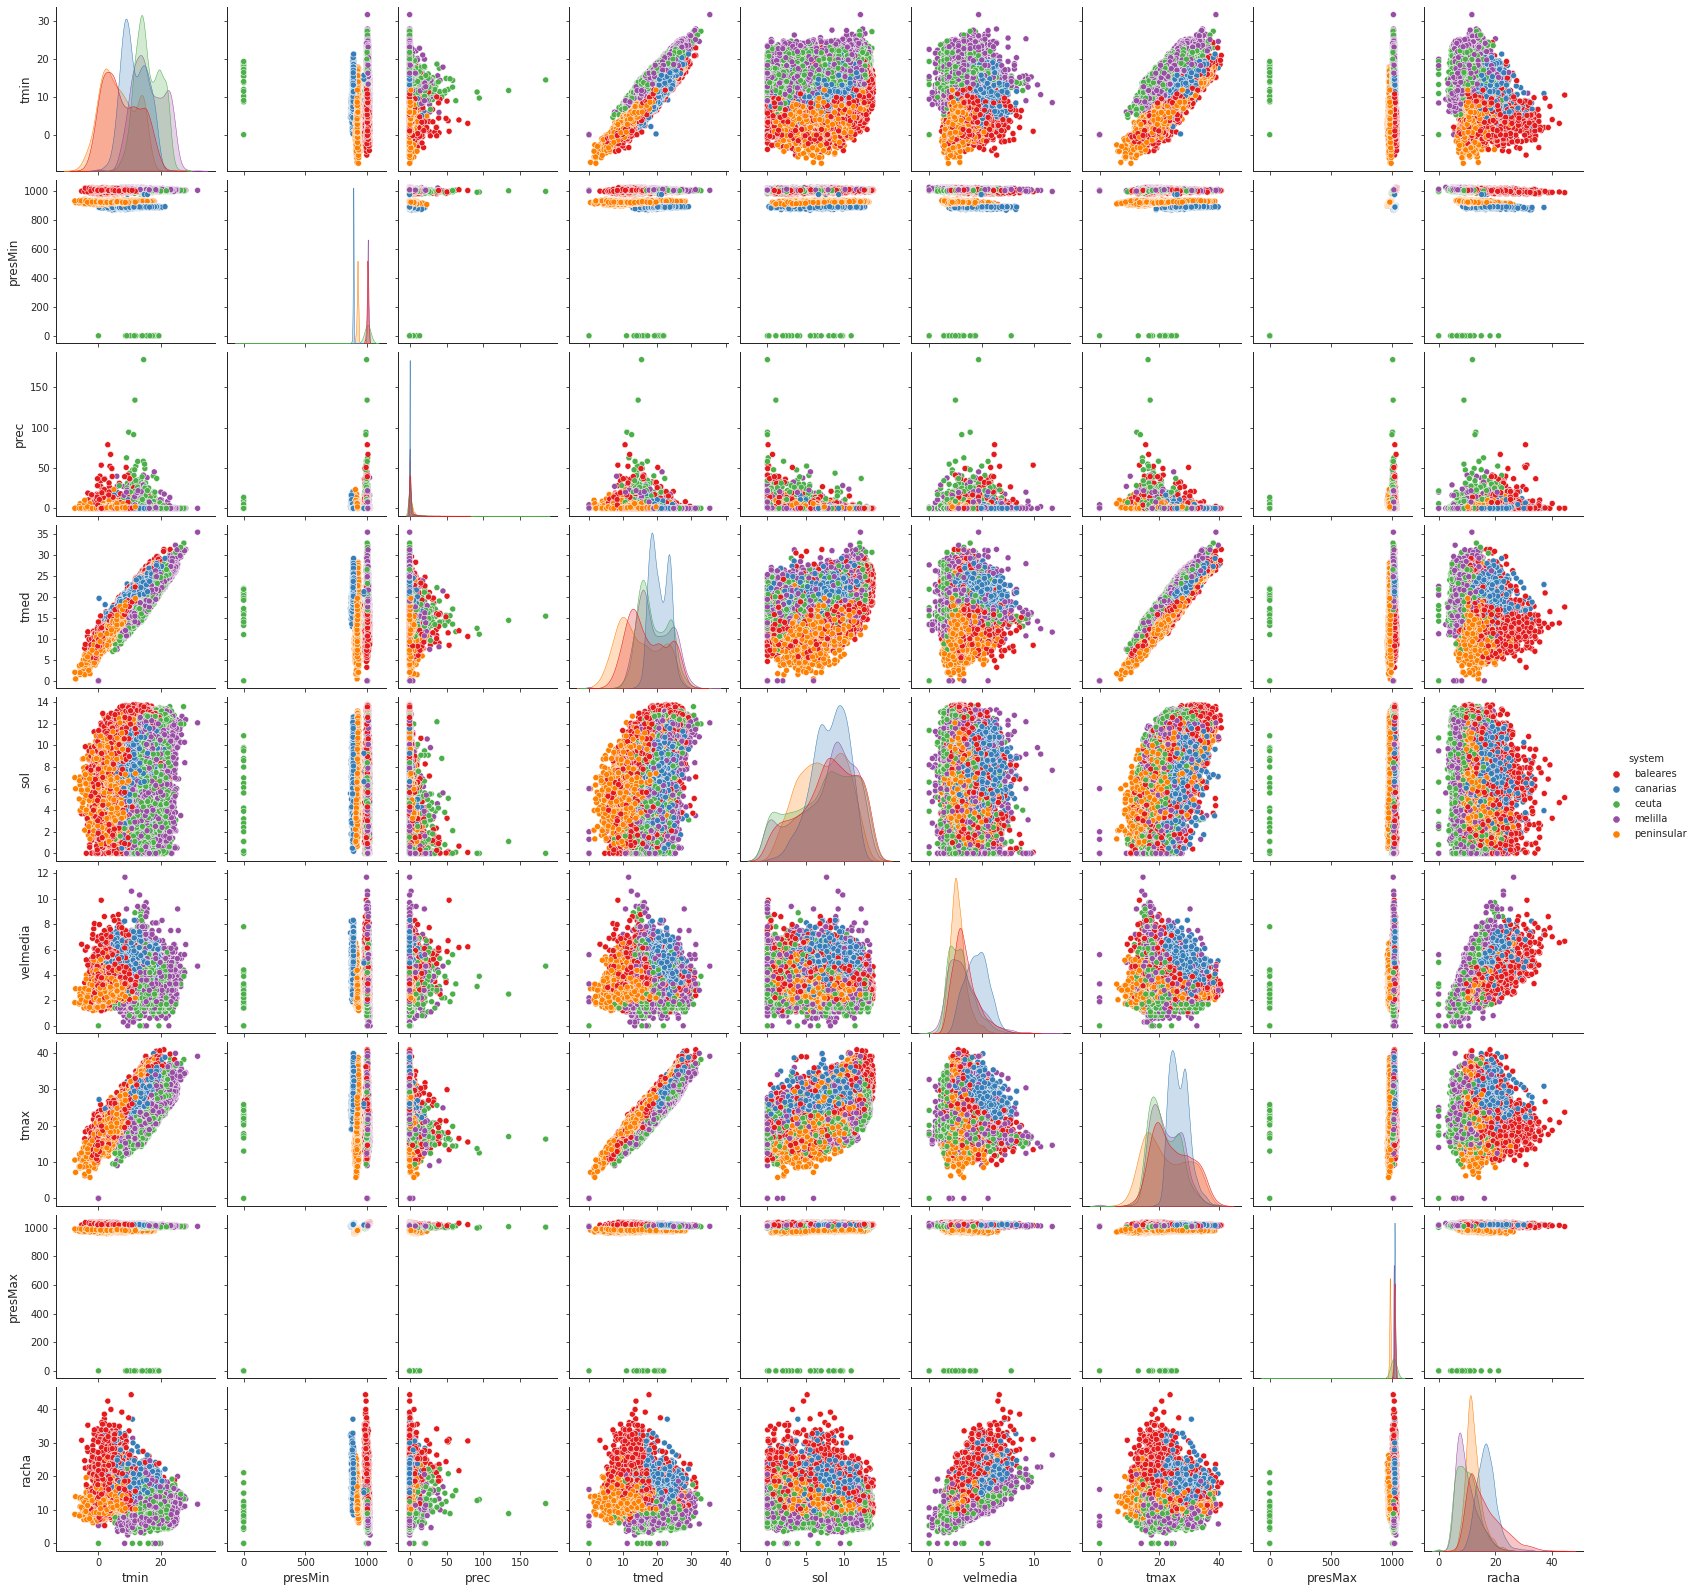

In [70]:
sns.pairplot(data=df_weather_system,hue='system');

Vemos que en funcion de la presion (minima y maxima):
    - Hay 2 grupos muy claramente diferenciandos para temperaturas , velocidad del viento y horas de sol.
    - Y 2 grupos pero no tan claramente diferenciados para las precipitaciones
    - Se ve claramente un dato outlier para precipitaciones y otro para temperatura minima

## Precipitacions

In [71]:
df_weather_system['prec'].describe()

count    9875.000000
mean        1.346106
std         4.995167
min         0.000000
25%         0.000000
50%         0.000000
75%         0.469215
max       184.400000
Name: prec, dtype: float64

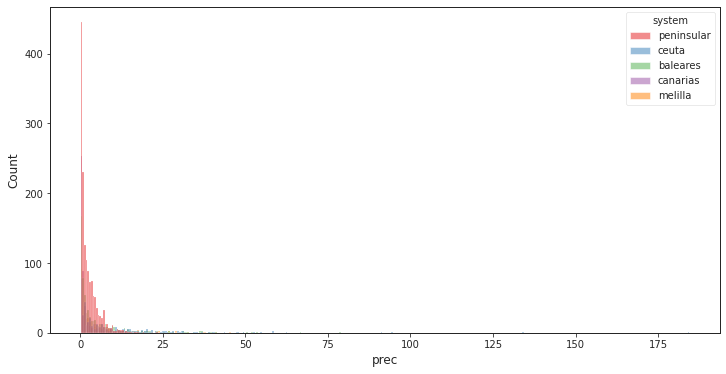

In [72]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.histplot(data=df_weather_system[df_weather_system['prec']>0.1],x='prec',hue='system',alpha=0.5);

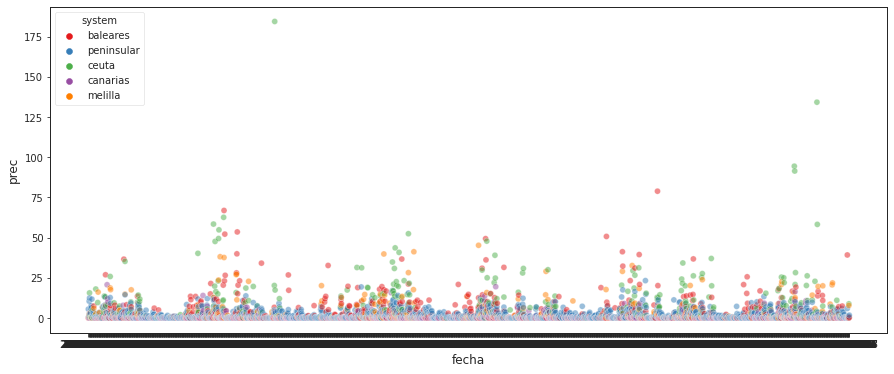

In [73]:
f,ax=plt.subplots(1,1)
f.set_size_inches(15,6)
ax=sns.scatterplot(data=df_weather_system[df_weather_system['prec']>0],y='prec',x='fecha',hue='system',alpha=0.5);

## Hours of sun

In [74]:
df_weather_system['sol'].describe()

count    9875.000000
mean        7.640371
std         3.365804
min         0.000000
25%         5.400000
50%         8.100000
75%        10.216667
max        13.783333
Name: sol, dtype: float64

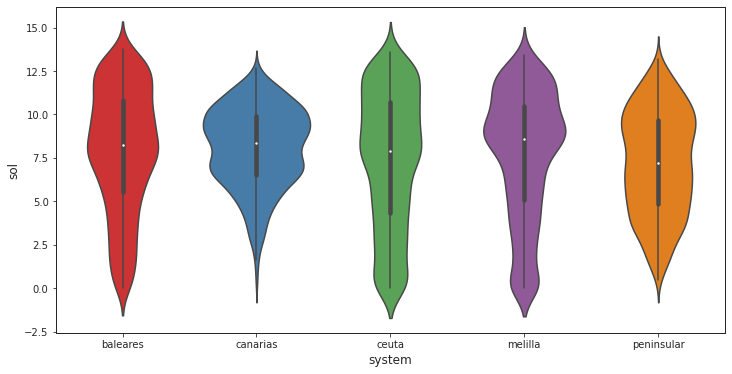

In [75]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='sol', data=df_weather_system);

## Temperature

In [76]:
df_weather_system['tmax'].describe()

count    9875.000000
mean       23.548778
std         5.872042
min         0.000000
25%        18.800000
50%        23.600000
75%        27.900000
max        40.900000
Name: tmax, dtype: float64

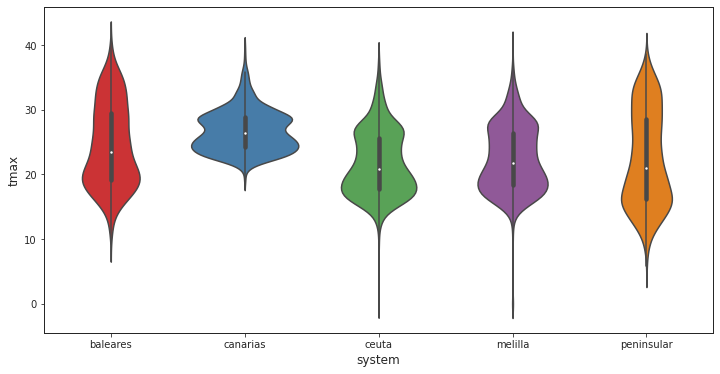

In [77]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='tmax', data=df_weather_system);

In [78]:
df_weather_system['tmin'].describe()

count    9875.000000
mean       11.462427
std         6.365921
min        -7.570213
25%         7.198936
50%        12.000000
75%        15.754255
max        31.800000
Name: tmin, dtype: float64

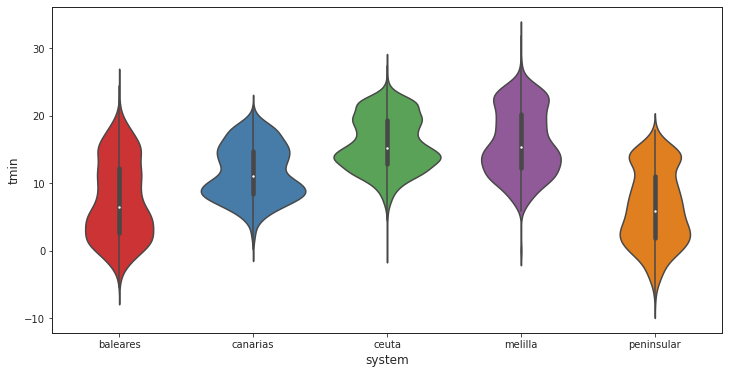

In [79]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='tmin', data=df_weather_system);

## Wind

In [80]:
df_weather_system['velmedia'].describe()

count    9875.000000
mean        3.394432
std         1.337152
min         0.000000
25%         2.465773
50%         3.100000
75%         4.200000
max        11.700000
Name: velmedia, dtype: float64

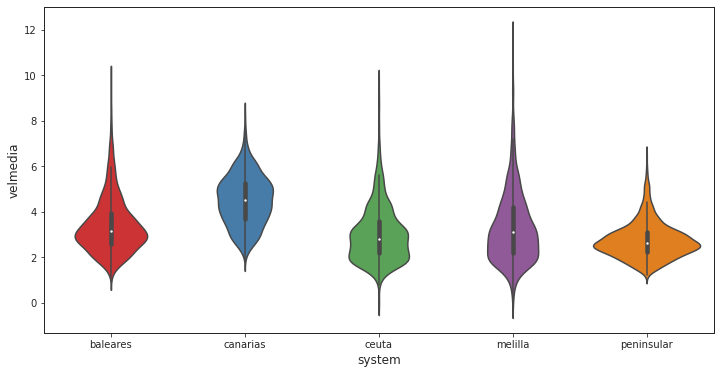

In [81]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='velmedia', data=df_weather_system);

In [82]:
df_weather_system['racha'].describe()

count    9875.000000
mean       13.008157
std         5.042487
min         0.000000
25%         9.526596
50%        12.200000
75%        16.000000
max        44.400000
Name: racha, dtype: float64

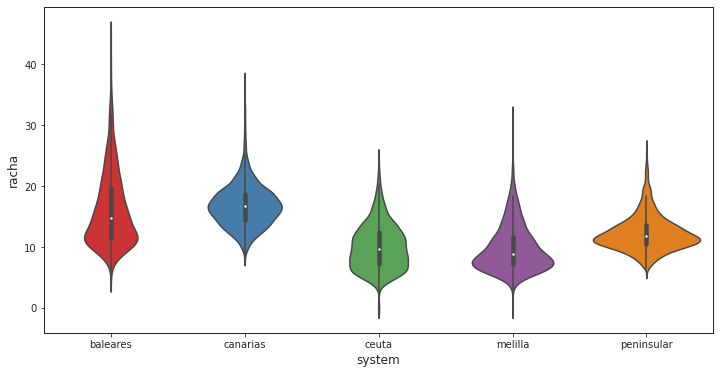

In [83]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='racha', data=df_weather_system);

#5- Outliers

Vamos a buscar los outlier de precipitaciones y temperatura minima, por si fuesen datos erroneos.



### Outlier de Precipitaciones


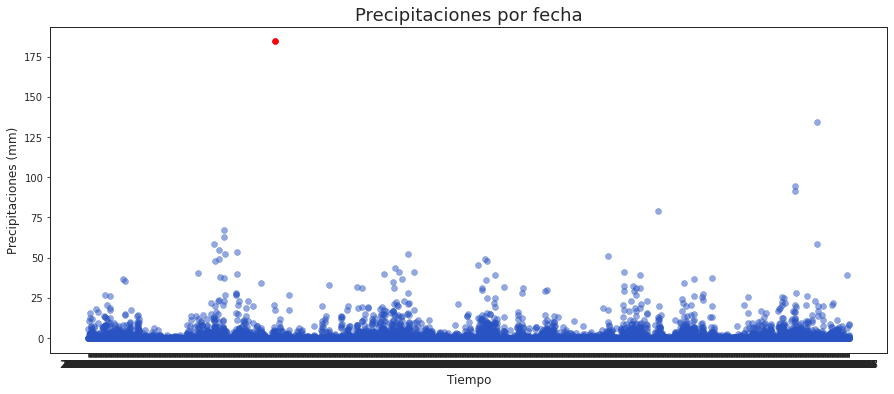

In [84]:

maxprec_mm=df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]['prec']
maxprec_fec=df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]['fecha']
plt.figure(figsize=(15,6))
plt.scatter(df_weather_system['fecha'],df_weather_system['prec'],c='#2953C2',alpha=0.5)
plt.scatter(maxprec_fec,maxprec_mm,c='r')
plt.title('Precipitaciones por fecha',fontsize=18)
plt.xlabel('Tiempo')
plt.ylabel('Precipitaciones (mm)')
plt.minorticks_off();


In [85]:
df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
2417,2017-04-28,ceuta,0,4,14.5,998.7,184.4,15.4,0.0,4.7,16.3,1002.7,11.9


### Outliers de Temperatura mínima

El 02-08-2020 tenemos un dato máximo en la serie histórica de temperaturas minimas de 31,8 grados en la estación de MELILLA

In [86]:
tminGrouped=df_weather_system.groupby('fecha')['tmin'].mean().reset_index()
maxtmin_celsius=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]['tmin']
maxtmin_fec=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]['fecha']
mintmin_celsius=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]['tmin']
mintmin_fec=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]['fecha']

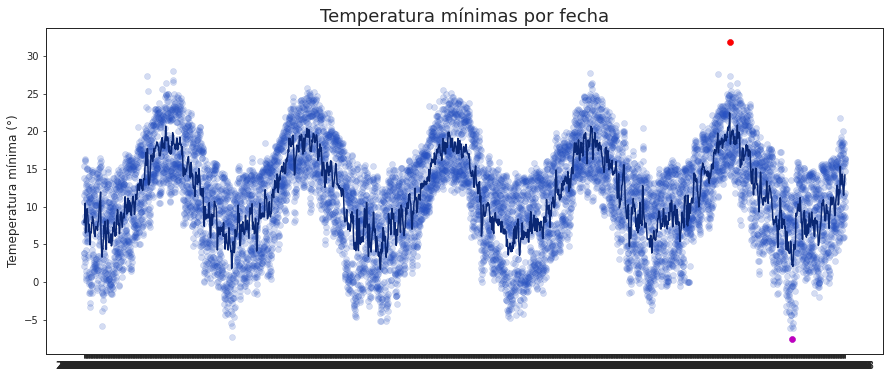

In [87]:

plt.figure(figsize=(15,6))
plt.plot(tminGrouped['fecha'],tminGrouped['tmin'],c='#0A2774')
plt.scatter(df_weather_system['fecha'],df_weather_system['tmin'],c='#2953C2',alpha=0.2)
plt.scatter(maxtmin_fec,maxtmin_celsius,c='r')
plt.scatter(mintmin_fec,mintmin_celsius,c='m')
plt.title('Temperatura mínimas por fecha',fontsize=18)
plt.ylabel('Tiempo')
plt.ylabel('Temeperatura mínima (°)');



In [88]:
df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
8378,2020-08-02,melilla,0,6,31.8,1005.7,0.0,35.4,12.1,4.7,39.1,1008.3,11.7


In [89]:
df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
9194,2021-01-12,peninsular,0,1,-7.570213,932.525532,0.022589,2.022069,7.020053,1.827664,10.544681,989.948936,8.670213


### Outliers de Temperatura máxima

In [90]:
tmaxGrouped=df_weather_system.groupby('fecha')['tmax'].mean().reset_index()
maxtmax_celsius=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]['tmax']
maxtmax_fec=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]['fecha']
mintmax_celsius=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]['tmax']
mintmax_fec=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]['fecha']

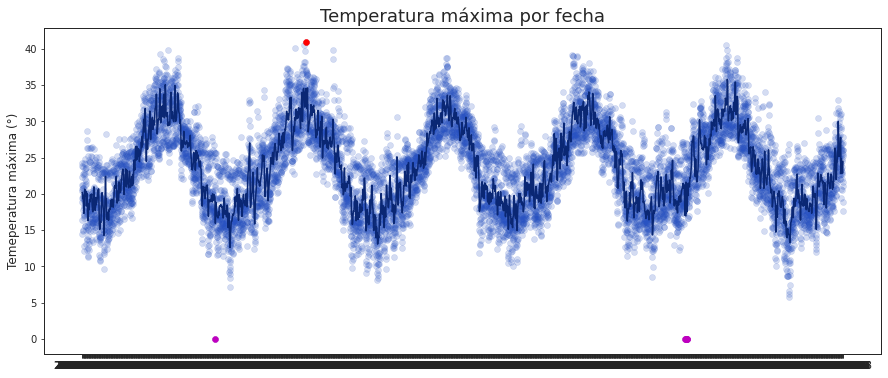

In [91]:
plt.figure(figsize=(15,6))
plt.plot(tmaxGrouped['fecha'],tmaxGrouped['tmax'],c='#0A2774')
plt.scatter(df_weather_system['fecha'],df_weather_system['tmax'],c='#2953C2',alpha=0.2)
plt.scatter(maxtmax_fec,maxtmax_celsius,c='r')
plt.scatter(mintmax_fec,mintmax_celsius,c='m')
plt.title('Temperatura máxima por fecha',fontsize=18)
plt.ylabel('Tiempo')
plt.ylabel('Temeperatura máxima (°)');


In [92]:
df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
2900,2017-08-03,baleares,0,3,21.0,1003.6,0.0,31.28,11.633333,2.77,40.9,1016.4,18.1


In [93]:
df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
1732,2016-12-12,ceuta,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7823,2020-04-13,melilla,0,0,0.0,1001.9,1.0,0.0,2.0,1.9,0.0,1005.6,6.4
7833,2020-04-15,melilla,0,2,0.0,1004.5,0.0,0.0,6.0,3.3,0.0,1011.8,8.1
7843,2020-04-17,melilla,0,4,0.0,1008.4,0.0,0.0,0.0,2.2,0.0,1010.8,6.1
7848,2020-04-18,melilla,0,5,0.0,1004.9,4.4,0.0,0.0,1.9,0.0,1009.1,5.3
7853,2020-04-19,melilla,0,6,0.0,1001.7,0.4,0.0,1.3,5.6,0.0,1006.2,16.1


#6- Correlation Matrix

In [94]:
features_columns=['Holiday','weekday','tmin','tmed','tmax','prec','sol','velmedia','racha','presMax','presMin']
df_Matrix_Corr=df_weather_system[features_columns].corr()

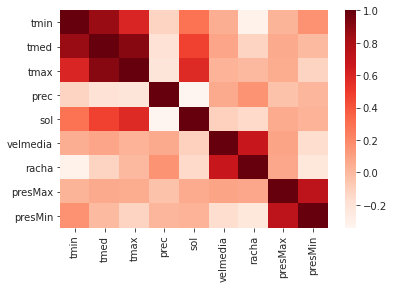

In [95]:
sns.heatmap(df_Matrix_Corr,cmap='Reds');

In [96]:
df_Matrix_Corr

,tmin,tmed,tmax,prec,sol,velmedia,racha,presMax,presMin
tmin,1.000000,0.862312,0.600847,-0.120393,0.290385,0.049695,-0.312185,0.023446,0.166300
tmed,0.862312,1.000000,0.909452,-0.189559,0.476076,0.086254,-0.119209,0.063319,-0.003274
tmax,0.600847,0.909452,1.000000,-0.212627,0.580012,0.026863,-0.000986,0.052910,-0.111652
prec,-0.120393,-0.189559,-0.212627,1.000000,-0.341845,0.063766,0.159813,-0.034833,0.018967
sol,0.290385,0.476076,0.580012,-0.341845,1.000000,-0.105348,-0.144870,0.057942,0.027976
velmedia,0.049695,0.086254,0.026863,0.063766,-0.105348,1.000000,0.683546,0.092394,-0.163008
racha,-0.312185,-0.119209,-0.000986,0.159813,-0.144870,0.683546,1.000000,0.074484,-0.221934
presMax,0.023446,0.063319,0.052910,-0.034833,0.057942,0.092394,0.074484,1.000000,0.728085
presMin,0.166300,-0.003274,-0.111652,0.018967,0.027976,-0.163008,-0.221934,0.728085,1.000000


#7- Preprocesing 


In [97]:
df_ree=df_ree_filtered[df_ree_filtered['Renov_norenov']!='Generación total']
df_ree['Generacion_Mwh']=df_ree['Generacion_Mwh'].astype(float)

In [98]:
df_ree_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72635 entries, 0 to 736
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Generacion_Mwh  72635 non-null  float64
 1   Tecnologia      72635 non-null  object 
 2   Renov_norenov   72635 non-null  object 
 3   system          72635 non-null  object 
 4   fecha           72635 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.3+ MB


In [99]:
df_ree.reset_index(inplace=True,drop=True) #to join by index before encoding

In [100]:
df_weather_system['Holiday']=df_weather_system['Holiday'].astype(int)
df_weather_system['weekday']=df_weather_system['weekday'].astype(int)

In [101]:
df_weather_system['year']=df_weather_system['fecha'].str.slice(0,4).astype(int)
df_weather_system['month']=df_weather_system['fecha'].str.slice(5,7).astype(int)
df_weather_system['day']=df_weather_system['fecha'].str.slice(8,10).astype(int)

## Encoder for REE categorical variables

In [102]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder().fit(df_ree[['Tecnologia','Renov_norenov']])

df_transform=enc.transform(df_ree[['Tecnologia','Renov_norenov']])

df_onehot =  pd.DataFrame(df_transform.todense(), columns= enc.get_feature_names())

df_ree_onehot=pd.merge(df_ree[['Generacion_Mwh','fecha','system']],df_onehot,how='inner',left_index=True,right_index=True)

In [103]:
df_ree_onehot.head()

,Generacion_Mwh,fecha,system,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,29281.000,2016-01-01,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35544.881,2016-01-02,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,35910.705,2016-01-03,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,65268.886,2016-01-04,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79718.832,2016-01-05,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
tech_names=[x for x in enc.get_feature_names() if x[0:3]=='x0_']
renov_names=[x for x in enc.get_feature_names() if x[0:3]=='x1_']


df_ree_target=target_preprocesing(df_ree_onehot,tech_names,renov_names, ['system'])

In [105]:
df_ree_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 7495
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   system                     7496 non-null   object 
 1   fecha                      7496 non-null   object 
 2   Generacion_Mwh             7496 non-null   float64
 3   x0_Carbón                  7496 non-null   float64
 4   x0_Ciclo combinado         7496 non-null   float64
 5   x0_Cogeneración            7496 non-null   float64
 6   x0_Eólica                  7496 non-null   float64
 7   x0_Fuel + Gas              7496 non-null   float64
 8   x0_Hidroeólica             7496 non-null   float64
 9   x0_Hidráulica              7496 non-null   float64
 10  x0_Motores diésel          7496 non-null   float64
 11  x0_Nuclear                 7496 non-null   float64
 12  x0_Otras renovables        7496 non-null   float64
 13  x0_Residuos no renovables  7496 non-null   float

In [106]:
df_weather_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9875 entries, 0 to 9874
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     9875 non-null   object 
 1   system    9875 non-null   object 
 2   Holiday   9875 non-null   int64  
 3   weekday   9875 non-null   int64  
 4   tmin      9875 non-null   float64
 5   presMin   9875 non-null   float64
 6   prec      9875 non-null   float64
 7   tmed      9875 non-null   float64
 8   sol       9875 non-null   float64
 9   velmedia  9875 non-null   float64
 10  tmax      9875 non-null   float64
 11  presMax   9875 non-null   float64
 12  racha     9875 non-null   float64
 13  year      9875 non-null   int64  
 14  month     9875 non-null   int64  
 15  day       9875 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 1.6+ MB


In [107]:
df_ree_weather=pd.merge(df_weather_system,
                            df_ree_target, 
                             on=['fecha','system'])

In [108]:
df_ree_weather.head(10)

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,2016-01-01,baleares,1,4,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,2016,1,1,8814.678,3032.187,2277.467,69.160,11.053,0.0,0.000,0.000,1022.316,0.000,1.362,485.0490,485.0490,144.200,0.000,1286.835,0.000,0.000,0.927205,0.072795
1,2016-01-01,canarias,1,4,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,2016,1,1,20220.015,0.000,7124.185,0.000,383.526,0.0,11.815,9.163,6026.826,0.000,26.995,0.0000,0.0000,697.304,0.000,160.570,5779.631,0.000,0.944174,0.055826
2,2016-01-01,melilla,1,4,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,2016,1,1,479.011,0.000,0.000,0.000,0.000,0.0,0.000,0.000,447.061,0.000,0.000,15.9025,15.9025,0.145,0.000,0.000,0.000,0.000,0.966499,0.033501
3,2016-01-01,peninsular,1,4,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,2016,1,1,537090.081,24401.321,48452.794,41918.271,199437.416,0.0,0.000,29281.000,0.000,162745.220,7169.124,3848.0700,1179.2320,8179.808,695.552,0.000,0.000,9782.273,0.542084,0.457916
4,2016-01-02,baleares,0,5,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,2016,1,2,9435.611,3269.033,2433.496,90.243,26.863,0.0,0.000,0.000,1189.254,0.000,2.335,458.4040,458.4040,194.499,0.000,1313.080,0.000,0.000,0.927710,0.072290
5,2016-01-02,canarias,0,5,8.000000,895.150000,0.000000,18.325000,9.000000,3.068889,23.900000,1026.300000,10.150000,2016,1,2,22942.014,0.000,7635.782,0.000,384.351,0.0,13.572,9.639,6438.261,0.000,26.462,0.0000,0.0000,688.569,0.000,405.666,7339.712,0.000,0.951068,0.048932
6,2016-01-02,melilla,0,5,11.600000,1016.400000,0.000000,17.000000,7.900000,2.500000,22.400000,1018.000000,9.700000,2016,1,2,520.350,0.000,0.000,0.000,0.000,0.0,0.000,0.000,488.861,0.000,0.000,15.6725,15.6725,0.144,0.000,0.000,0.000,0.000,0.969604,0.030396
7,2016-01-02,peninsular,0,5,2.136170,922.636170,0.791592,8.648970,4.436543,3.055813,14.544681,982.923404,14.508511,2016,1,2,619096.702,28801.603,46225.570,53159.017,235393.376,0.0,0.000,35544.881,0.000,169614.296,7847.535,4097.2255,1139.0335,11752.604,1260.093,0.000,0.000,24261.468,0.526831,0.473169
8,2016-01-03,baleares,0,6,2.700000,996.900000,0.833333,10.711111,0.800000,4.444444,17.800000,1019.800000,26.100000,2016,1,3,9497.967,3496.317,2328.145,92.967,14.978,0.0,0.000,0.000,1186.662,0.000,0.000,461.2040,461.2040,113.364,0.000,1343.126,0.000,0.000,0.937929,0.062071
9,2016-01-03,canarias,0,6,8.800000,895.650000,0.005000,18.271111,8.775000,3.071111,23.700000,1025.900000,11.250000,2016,1,3,22186.025,0.000,7568.024,0.000,532.887,0.0,20.916,9.687,6321.969,0.000,27.377,0.0000,0.0000,693.399,0.000,273.609,6738.157,0.000,0.942114,0.057886


In [109]:
df_ree_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7480 entries, 0 to 7479
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      7480 non-null   object 
 1   system                     7480 non-null   object 
 2   Holiday                    7480 non-null   int64  
 3   weekday                    7480 non-null   int64  
 4   tmin                       7480 non-null   float64
 5   presMin                    7480 non-null   float64
 6   prec                       7480 non-null   float64
 7   tmed                       7480 non-null   float64
 8   sol                        7480 non-null   float64
 9   velmedia                   7480 non-null   float64
 10  tmax                       7480 non-null   float64
 11  presMax                    7480 non-null   float64
 12  racha                      7480 non-null   float64
 13  year                       7480 non-null   int64

In [110]:
df_ree_weather.to_pickle(Ing_AEMET.path_Data+"Wheater_ree.pkl")